In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


In [103]:
path = r'/Users/jonathan.phelan/Downloads/teacher_salary_data' # use your path
all_files = glob.glob(path + "/*.csv")


In [104]:
all_files

['/Users/jonathan.phelan/Downloads/teacher_salary_data/2006_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2008_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2005_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2004_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2009_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2003_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2007_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2011_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2010_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2012-tsr-public-dataset.csv']

In [105]:
dfs=[]


for i in all_files:
    file=pd.read_csv(i)
    file_name=str(i)
    file_name=file_name.split('/')[5]
    file['filename']=file_name
    dfs.append(file)
    

master_df = pd.concat(dfs, axis=0, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
master_df['year']=master_df['filename'].str[0:4]
master_df['year'].value_counts()

2010    167821
2009    167743
2008    164325
2011    163228
2012    162960
2007    160869
2005    160566
2006    159909
2003    159250
2004    158216
Name: year, dtype: int64

In [107]:
master_df.shape

(1624887, 63)

In [108]:
master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006


In [109]:
for i in master_df.columns:
    print (i,'--',master_df[i].dtype, master_df[i].isnull().sum())

fy -- int64 0
rcdt -- object 0
dst_name -- object 41
dst_addr -- object 41
dst_city -- object 41
dst_st -- object 41
dst_zip -- float64 41
dst_zip_plus4 -- object 41
sch_num -- object 0
sch_name -- object 21
sch_addr -- object 121104
sch_city -- object 121104
sch_st -- object 121104
sch_zip -- float64 121104
sch_zip_plus4 -- object 121104
last_name -- object 0
first_name -- object 0
mid_init -- object 0
gender -- object 0
race_ethnicity_cd -- object 328
race_ethnicity_desc -- object 419
tsr_status_cd -- int64 0
tsr_status_desc -- object 0
location_cd -- object 9
location_desc -- object 54
emply_type -- object 0
emply_desc -- object 222
salary -- float64 0
months_employed -- int64 0
pct_emp -- int64 0
fte -- int64 0
dist_exp -- float64 0
state_exp -- float64 0
out_of_state_exp -- float64 0
bacc_coll -- object 0
bacc_coll_desc -- object 6390
high_degre_cd -- int64 0
high_degre_desc -- object 3
adv_coll -- object 0
adv_coll_desc -- object 660937
pos_cd -- int64 0
pos_desc -- object 0
low_

In [110]:
master_df['salary'].describe()

count    1.624887e+06
mean     6.110860e+04
std      2.446809e+04
min      0.000000e+00
25%      4.424000e+04
50%      5.687100e+04
75%      7.417092e+04
max      4.416120e+05
Name: salary, dtype: float64

In [111]:
#Remove cases where salary is listed as $0.
master_df=master_df[master_df['salary']>0]
master_df['salary'].describe()

count    1.616995e+06
mean     6.140685e+04
std      2.415150e+04
min      4.000000e-02
25%      4.441693e+04
50%      5.700600e+04
75%      7.427562e+04
max      4.416120e+05
Name: salary, dtype: float64

In [112]:
#Show mean salary by zip and year.
salaries_zip=pd.pivot_table(data=master_df, index='sch_zip', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
#Create a summary table of salary with different stats.
salaries_zip.columns = salaries_zip.columns.get_level_values(0)
salaries_zip['std_error']=salaries_zip['std']/np.sqrt(salaries_zip['len'])
salaries_zip

,amin,amax,median,mean,std,len,std_error
sch_zip,,,,,,,
60002.0,2398.86,155317.02,49809.455,53882.934976,19926.864281,3680.0,328.484630
60004.0,3709.00,202678.99,69134.885,72301.556845,27570.773711,5480.0,372.442021
60005.0,3480.00,166748.40,63944.945,66891.319658,23915.246052,2396.0,488.575232
60007.0,912.00,201503.10,71718.080,74436.359363,26254.312142,5102.0,367.561840
60008.0,115.32,198583.92,76534.000,77794.352633,27125.338157,4029.0,427.342934
60010.0,2929.57,188754.60,63096.055,69076.722752,26683.793690,6370.0,334.331932
60012.0,20322.68,174207.78,78604.125,80365.826349,27714.821616,1090.0,839.457742
60013.0,786.80,441612.00,67015.310,69322.390903,26542.480867,3423.0,453.667913
60014.0,767.27,174207.78,54313.180,61221.488887,24841.497403,9089.0,260.567184


In [113]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year['std_error']=salaries_year['std']/np.sqrt(salaries_year['len'])
salaries_year



,amin,amax,median,mean,std,len,std_error
year,,,,,,,
2003,40.00,353351.13,49461.540,53574.750243,20859.142724,159217.0,52.275926
2004,70.00,302746.00,51324.130,55583.790745,21864.080655,158184.0,54.973064
2005,100.00,361146.50,53117.580,57515.463402,22546.076454,160541.0,56.270140
2006,41.00,441612.00,54262.705,58716.460367,23101.872025,159896.0,57.773459
2007,90.00,385378.73,55661.900,60349.983139,23485.898289,158551.0,58.982433
2008,16.00,411510.88,58280.500,62943.360078,24376.322021,163880.0,60.215071
2009,36.00,368589.94,59178.000,63743.418337,24203.229284,166729.0,59.274479
2010,0.04,413000.00,60958.000,65478.907039,24687.961126,166365.0,60.527710
2011,52.21,358750.55,62676.195,67114.777919,25141.948123,161946.0,62.476086


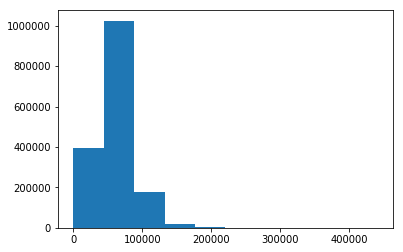

In [114]:
master_df['salary'].hist().grid(False)

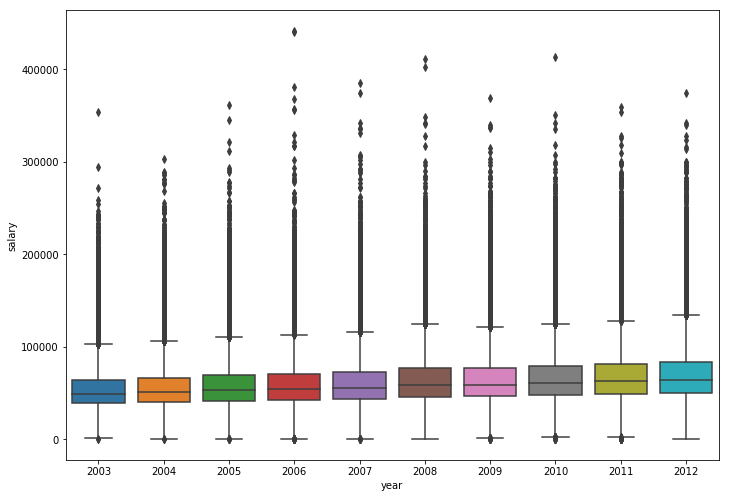

In [115]:
#Show boxplot of salaries by zipcode.
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="year", y="salary", data=master_df)



In [116]:
#Install the CPI package to get current dollar values of salaries for comparisons over time.
#!pip install cpi
#import cpi

#cpi.update()

#cpi.inflate(100, 1950)

master_df.year=master_df.year.astype(int)

master_df['salary_adjusted'] = master_df.apply(lambda x: cpi.inflate(x.salary, x.year, to=2018), axis=1)

master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,118995.571652
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,31101.893800
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,86642.788830
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,118514.171134
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,81883.800496


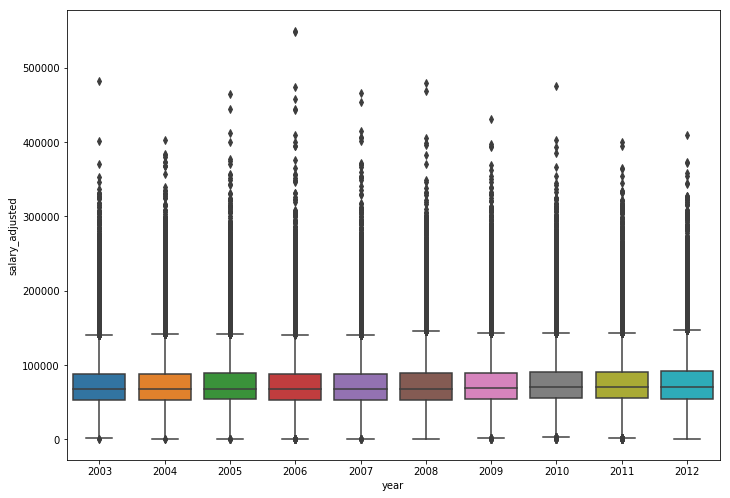

In [117]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="year", y="salary_adjusted", data=master_df)

In [179]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary_adjusted', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year['std_error']=salaries_year['std']/np.sqrt(salaries_year['len'])
salaries_year

,amin,amax,median,mean,std,len,std_error
year,,,,,,,
2003,54.588478,337394.611820,66953.546473,72070.538824,26606.863106,147493.0,69.280015
2004,93.051826,292286.088773,67592.846670,72748.323246,27082.085517,146928.0,70.652872
2005,128.575013,351576.209308,67668.077782,72839.091514,27030.695404,148855.0,70.060867
2006,51.068388,550058.851607,67245.507966,72301.708622,26736.503358,147152.0,69.698194
2007,108.996875,305393.753323,67031.267399,72190.068443,26394.712427,147792.0,68.658051
2008,18.660734,276197.138204,67572.290375,72498.510673,26387.656919,151025.0,67.901037
2009,42.136564,313930.580109,68830.732517,73599.262623,26148.697878,154235.0,66.582270
2010,0.046063,475598.887442,69755.668498,74502.928561,26376.196142,153676.0,67.283588
2011,58.283786,261653.005046,69550.942349,74050.477425,26023.334931,150213.0,67.144306


In [119]:
salaries_year['percent_diff_cum']=salaries_year['mean'].pct_change().cumsum()
salaries_year

,amin,amax,median,mean,std,len,std_error,percent_diff_cum
year,,,,,,,,
2003,54.588478,482222.511961,67500.755026,73114.102225,28466.721479,159217.0,71.341582,NaN
2004,93.051826,402443.831773,68225.771900,73888.189215,29064.180524,158184.0,73.076343,0.010587
2005,128.575013,464344.158605,68295.935284,73950.514432,28988.620687,160541.0,72.349339,0.011431
2006,51.068388,550058.851607,67588.021153,73135.487170,28775.008823,159896.0,71.960913,0.000410
2007,108.996875,466723.079521,67410.812683,73088.439467,28443.216819,158551.0,71.432232,-0.000234
2008,18.660734,479943.440380,67972.306533,73410.580991,28430.003733,163880.0,70.228588,0.004174
2009,42.136564,431419.820654,69265.488219,74609.128255,28328.914340,166729.0,69.378413,0.020501
2010,0.046063,475598.887442,70197.474529,75403.620674,28429.943935,166365.0,69.701965,0.031149
2011,58.283786,400485.350957,69967.552527,74922.492493,28066.805522,161946.0,69.744164,0.024769


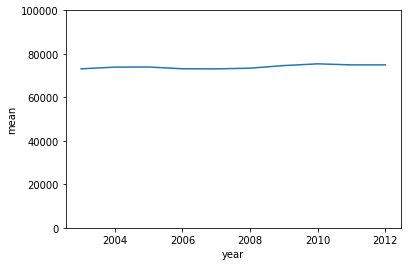

In [132]:
#We can see that from 2003 to 2012, salaries only rose 2.4% after adjusting for inflation.
ax = sns.lineplot(x=salaries_year.index, y='mean', data=salaries_year)
plt.ylim(0, 100000)
plt.show()

In [120]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
#sns.boxplot(x="race_ethnicity_cd", y="salary", data=master_df)
salaries_race=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_race['standard_error']=salaries_race['std']/np.sqrt(salaries_race['len'])
salaries_race

,amin,amax,median,mean,std,len,standard_error
,salary,salary,salary,salary,salary,salary,
race_ethnicity_desc,,,,,,,
American Indian or Alaska Native,19495.40,184340.00,70343.28,71538.506216,21328.749057,510.0,944.452883
American Indian or Alaskan Native,41.00,220973.56,57444.50,59168.145412,18946.046078,1989.0,424.816325
Asian,2430.00,358750.55,65537.14,68397.502947,23672.967614,3787.0,384.684822
Asian or Pacific Islander,309.00,341747.61,56365.96,59608.892840,21234.874745,14444.0,176.687556
Black or African American,190.00,323866.46,77983.96,77047.005847,25103.232522,24450.0,160.542572
"Black, Non-Hispanic",38.00,439803.00,67500.70,68658.534735,22694.347747,120068.0,65.494385
Hispanic,186.00,242825.66,58024.30,61111.215806,20903.036421,55648.0,88.610380
Hispanic or Latino,52.21,254426.14,68621.00,70586.532971,22615.297134,15650.0,180.777813


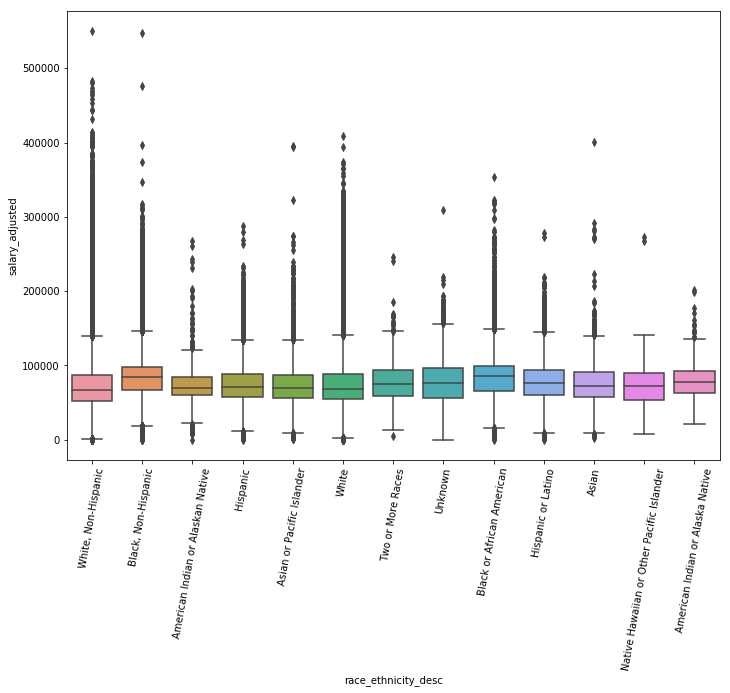

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=80)
sns.boxplot(x="race_ethnicity_desc", y="salary_adjusted", data=master_df)

In [51]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience['standard_error']=race_teacher_experience['std']/np.sqrt(race_teacher_experience['len'])
race_teacher_experience

,amin,amax,median,mean,std,len,standard_error
,state_exp,state_exp,state_exp,state_exp,state_exp,state_exp,
race_ethnicity_desc,,,,,,,
American Indian or Alaska Native,1.0,40.0,10.0,11.682353,7.565242,510.0,0.334995
American Indian or Alaskan Native,1.0,42.0,6.0,8.774962,7.437240,1989.0,0.166761
Asian,0.1,45.0,8.0,9.668392,7.334817,3787.0,0.119191
Asian or Pacific Islander,0.2,44.0,7.0,9.174965,8.087086,14444.0,0.067290
Black or African American,0.5,57.0,13.0,14.930323,9.918397,24450.0,0.063431
"Black, Non-Hispanic",0.0,55.0,14.0,15.898482,10.778735,120068.0,0.031107
Hispanic,0.4,45.0,8.0,10.262036,7.953005,55648.0,0.033714
Hispanic or Latino,0.5,53.0,10.0,11.383406,7.903379,15650.0,0.063177


In [52]:
gender_teacher_experience=pd.pivot_table(data=master_df, index='gender', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_teacher_experience['standard_error']=gender_teacher_experience['std']/np.sqrt(gender_teacher_experience['len'])
gender_teacher_experience

,amin,amax,median,mean,std,len,standard_error
,state_exp,state_exp,state_exp,state_exp,state_exp,state_exp,
gender,,,,,,,
,1.0,4.0,2.5,2.333333,1.211060,6.0,0.494413
F,0.0,63.0,11.0,13.141727,9.612695,1237302.0,0.008642
M,0.0,57.0,11.0,13.988441,10.399251,379687.0,0.016877


In [53]:
gender_race=pd.pivot_table(data=master_df, index=['race_ethnicity_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_race['standard_error']=gender_race['std']/np.sqrt(gender_race['len'])
gender_race


amin       amax  \
                                                    salary     salary   
race_ethnicity_desc                       gender                        
American Indian or Alaska Native          F       19495.40  184340.00   
                                          M       38960.82  161918.41   
American Indian or Alaskan Native         F          41.00  220973.56   
                                          M        6207.25  115346.00   
Asian                                     F        2430.00  259065.05   
                                          M       10314.57  358750.55   
Asian or Pacific Islander                 F         309.00  230610.77   
                                          M        2782.00  341747.61   
Black or African American                 F         190.00  323866.46   
                                          M        1630.13  295229.15   
Black, Non-Hispanic                       F          38.00  439803.00   
                                          M         585.00  340267.33   
Hispanic                                  F         464.00  191169.13   
                                          M         186.00  242825.66   
Hispanic or Latino                        F        1459.00  200676.91   
                                          M          52.21  254426.14   
Native Hawaiian or Other Pacific Islander F        6887.74  129173.57   
                                          M       11014.75  245000.00   
Two or More Races                         F        4497.00  165765.00   
                                          M       12480.00  225196.45   
Unknown                                           60533.00   60533.00   
                                          F           1.00  276454.20   
                                          M        1686.00  196468.12   
White                                     F           1.00  315435.23   
                                          M          58.00  374302.00   
White, Non-Hispanic                       F           0.04  441612.00   
                                          M          50.00  411510.88   

                                                     median          mean  \
                                                     salary        salary   
race_ethnicity_desc                       gender                            
American Indian or Alaska Native          F       68817.000  68853.788964   
                                          M       74666.140  77802.846471   
American Indian or Alaskan Native         F       57668.000  59536.906661   
                                          M       56807.610  57899.705491   
Asian                                     F       64396.855  67131.370909   
                                          M       69261.000  72360.206270   
Asian or Pacific Islander                 F       54903.760  58025.015174   
                                          M       60923.000  64385.184486   
Black or African American                 F       78373.000  76760.984164   
                                          M       75630.000  78275.325903   
Black, Non-Hispanic                       F       67593.500  68383.977870   
                                          M       66778.940  69860.794180   
Hispanic                                  F       57428.850  60224.411491   
                                          M       59780.000  63769.335456   
Hispanic or Latino                        F       68046.520  69527.249641   
                                          M       70532.210  74143.730877   
Native Hawaiian or Other Pacific Islander F       65892.000  65992.351792   
                                          M       65191.240  71126.117576   
Two or More Races                         F       66693.650  69132.105472   
                                          M       69869.000  72260.267541   
Unknown                                           60533.000  60533.000000   
               

In [54]:
#Let's look at scatterplots of all floating point variables with our outcome, salary.
vars1=[i for i in master_df.columns if master_df[i].dtype=='float64']
vars1=[i for i in vars1 if 'zip' not in i]
vars1

['salary',
 'dist_exp',
 'state_exp',
 'out_of_state_exp',
 'assignment_2',
 'assignment_3',
 'assignment_4',
 'assignment_5',
 'assignment_6',
 'assignment_7',
 'pct_admin',
 'salary_adjusted']

salary


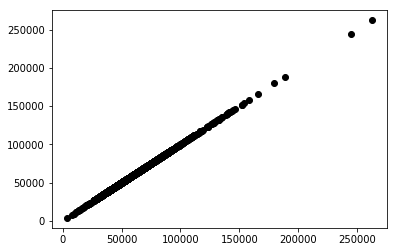

dist_exp


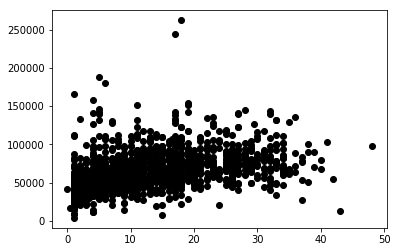

state_exp


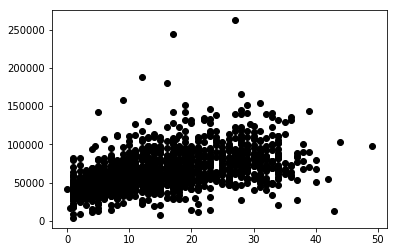

out_of_state_exp


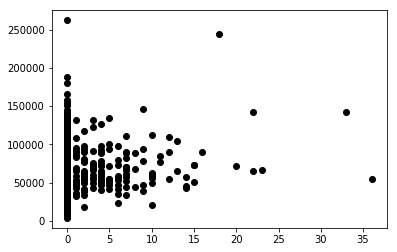

assignment_2


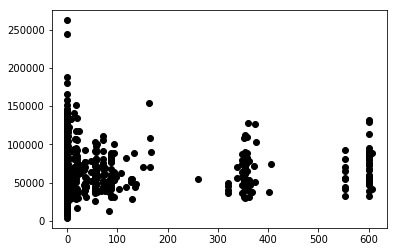

assignment_3


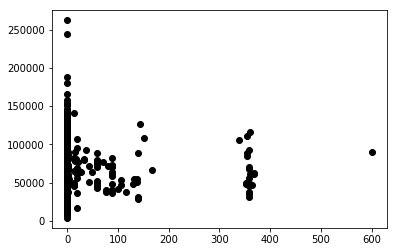

assignment_4


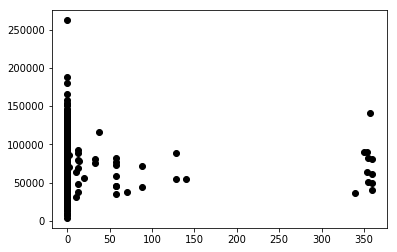

assignment_5


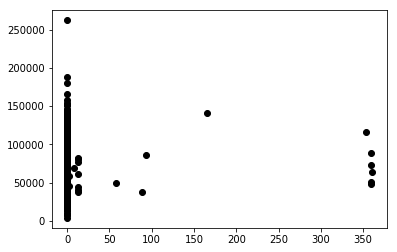

assignment_6


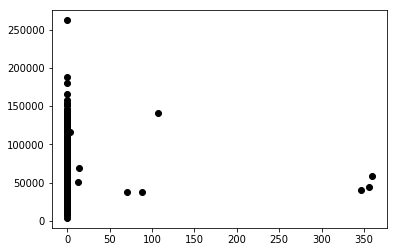

assignment_7


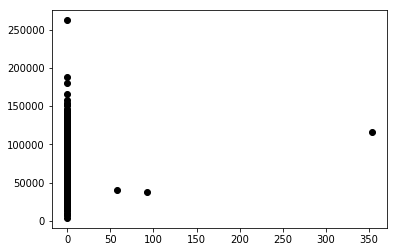

pct_admin


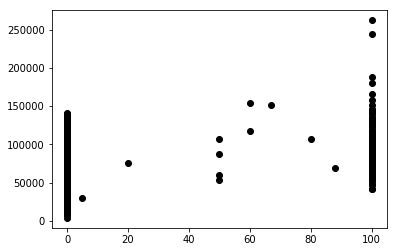

salary_adjusted


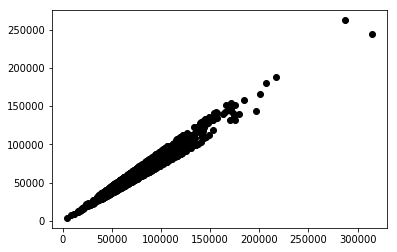

In [55]:
#Take a sample of the data to plot.
sample=master_df.sample(frac=.001)

for i in vars1:
    print (i)
    x=sample[i]
    y=sample['salary']
    plt.plot(x, y, 'o', color='black')
    plt.show()

In [56]:
corr=master_df.corr()

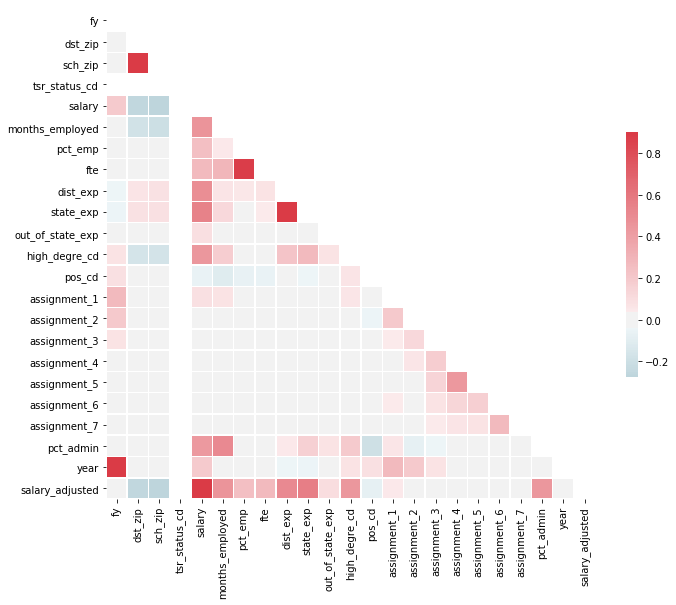

In [57]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [133]:
master_df.high_degre_desc.value_counts()

Masters                                   934209
Baccalaureate                             652371
Doctorate                                  20962
C.A.S., Specialist, 6 Year Certificate      5243
None                                        3826
Registered Nurse                             381
Name: high_degre_desc, dtype: int64

In [134]:
#Show one last table.  Interested in gender, education, and salary. 
gender_ed=pd.pivot_table(data=master_df, index=['high_degre_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_ed['standard_error']=gender_ed['std']/np.sqrt(gender_ed['len'])
gender_ed

amin       amax  \
                                                 salary     salary   
high_degre_desc                        gender                        
Baccalaureate                          F           1.00  368000.00   
                                       M          50.00  230000.00   
C.A.S., Specialist, 6 Year Certificate F        1000.00  287853.08   
                                       M         175.00  239492.92   
Doctorate                              F         175.08  402331.22   
                                       M        1539.35  380227.46   
Masters                                        58286.42   61820.00   
                                       F           0.04  441612.00   
                                       M          52.21  411510.88   
None                                           60533.00   60533.00   
                                       F         997.50  193156.78   
                                       M         705.00  221013.27   
Registered Nurse                               13824.00   13824.00   
                                       F        2414.67  116533.35   
                                       M        3051.02   49320.00   

                                                   median           mean  \
                                                   salary         salary   
high_degre_desc                        gender                              
Baccalaureate                          F        44988.000   47276.970700   
                                       M        48398.800   50815.678747   
C.A.S., Specialist, 6 Year Certificate F        73980.510   77267.636717   
                                       M        93708.560   95835.986442   
Doctorate                              F        93694.000   99909.616441   
                                       M       107448.000  116187.080738   
Masters                                         59697.000   59875.105000   
                                       F        64599.375   67100.590791   
                                       M        74121.230   77795.462763   
None                                            60533.000   60533.000000   
                                       F        41128.250   42698.926255   
                                       M        45448.000   46897.512073   
Registered Nurse                                13824.000   13824.000000   
                                       F        34188.960   34054.937398   
                                       M        40036.000   33206.971818   

                                                        std       len  \
                                                     salary    salary   
high_degre_desc                        gender                           
Baccalaureate                          F       14547.913530  509124.0   
                                       M       15607.999325  143247.0   
C.A.S., Specialist, 6 Year Certificate F       30014.432540    2769.0   
                                       M       33754.112215    2474.0   
Doctorate                              F       41910.447132   11949.0   
                                       M       53777.551697    9013.0   
Masters                                         1480.692110       4.0   
                                       F       21765.368550  711516.0   
                                       M       26754.344158  222689.0   
None                                                    NaN       1.0   
                                       F       18144.576331    1574.0   
                                       M       18519.147794    2251.0   
Registered Nurse                                        NaN       1.0   
                                       F       17962.015917     369.0   
                                       M       15414.857523      11.0   

                                              standard_error  
                                           

In [135]:
bins = [0, 5, 10, 20, 40, 60]
labels = ["0-5 years","6-10 years","11-20 years", "21-40 years", "40-60 years"]
master_df['years_exp_state'] = pd.cut(master_df['state_exp'], bins=bins, labels=labels)
master_df.years_exp_state.value_counts()

11-20 years    454426
0-5 years      432712
21-40 years    376954
6-10 years     348313
40-60 years      4549
Name: years_exp_state, dtype: int64

In [136]:
exp_ed_gender=pd.pivot_table(data=master_df, index=['high_degre_desc', 'years_exp_state', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
exp_ed_gender

amin  \
                                                                 salary   
high_degre_desc                        years_exp_state gender             
Baccalaureate                          0-5 years       F           1.00   
                                                       M          57.00   
                                       11-20 years     F          16.00   
                                                       M         176.00   
                                       21-40 years     F          60.00   
                                                       M         808.00   
                                       40-60 years     F         967.14   
                                                       M        2659.00   
                                       6-10 years      F          70.00   
                                                       M         592.50   
C.A.S., Specialist, 6 Year Certificate 0-5 years       F        1000.00   
                                                       M       15566.00   
                                       11-20 years     F        6250.00   
                                                       M         175.00   
                                       21-40 years     F        6439.00   
                                                       M        2119.00   
                                       40-60 years     F        6050.00   
                                                       M       29113.52   
                                       6-10 years      F       11307.95   
                                                       M        3793.76   
Doctorate                              0-5 years       F         216.00   
                                                       M        2458.64   
                                       11-20 years     F        3480.00   
                                                       M        3779.28   
                                       21-40 years     F         175.08   
                                                       M        2400.00   
                                       40-60 years     F       14700.00   
                                                       M        6875.00   
                                       6-10 years      F        4549.97   
                                                       M        1539.35   
Masters                                0-5 years               58286.42   
                                                       F           1.00   
                                                       M          52.21   
                                       11-20 years     F          92.99   
                                                       M         330.00   
                                       21-40 years     F           0.04   
                                                       M         150.00   
                                       40-60 years     F        4000.00   
                                                       M        1748.00   
                                       6-10 years      F         108.00   
                                                       M         186.00   
None                                   0-5 years               60533.00   
                                                       F        1225.00   
                                                       M         705.00   
                                       11-20 years     F        4787.43   
                                                       M        8306.69   
                                       21-40 years     F        2207.51   
                                                       M        2459.10   
                                       40-60 years     F       87009.00   
                                                       M       56232.11   
                                       6-10 years      F         997.50   
                 

In [137]:
#Read in income by zip code level.

income_zip=pd.read_excel('/Users/jonathan.phelan/Downloads/MedianZIP-3.xlsx')
income_zip.head()

,Zip,Median,Mean,Pop
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [138]:
income_zip['Zip']=income_zip['Zip'].astype(float)

In [139]:
income_zip["Mean"] = pd.to_numeric(income_zip.Mean, errors='coerce')


In [140]:
income_zip.describe()

,Zip,Median,Mean,Pop
count,32634.000000,32634.000000,32627.000000,32634.000000
mean,49875.280750,50938.205509,63452.186741,9192.768187
std,27382.476498,20356.270751,26463.006499,13416.240474
min,1001.000000,32.982400,53.616000,1.000000
25%,27301.250000,38462.000000,48593.189000,736.000000
50%,49875.000000,46503.319500,56949.604700,2756.000000
75%,72133.500000,58255.496175,70341.169450,12512.750000
max,99929.000000,223106.175000,361842.268400,113916.000000


In [141]:
master_df=pd.merge(income_zip, master_df, left_on='Zip', right_on='sch_zip', how='inner')
master_df.head()

,Zip,Median,Mean,Pop,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,...,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted,years_exp_state
0,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,NaN,0.0,NaN,0.0,NaN,100.0,2006_tsr_public_dataset.csv,2006,117675.976964,21-40 years
1,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,53073.756300,11-20 years
2,60002.0,78051.555,87531.7847,24299,2006,34049117016,CHSD 117,1625 Deep Lake Rd,Lake Villa,IL,...,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,90340.875000,11-20 years
3,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,100578.604545,21-40 years
4,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006,62069.303359,11-20 years


In [142]:
#Create categories for income.

cut_points=[0, 25000, 50000, 75000, 100000]
labels = ["0-$25,000","$25-$50,000","$50-$75,000", "$75-$100,000"]

master_df['income_bucket'] = pd.cut(master_df['Median'], bins=cut_points, labels=labels)
master_df.income_bucket.value_counts()

$25-$50,000     542665
$50-$75,000     525130
$75-$100,000    291838
0-$25,000        24179
Name: income_bucket, dtype: int64

In [143]:
pd.crosstab(master_df['gender'], master_df['income_bucket']).apply(lambda r: r/r.sum(), axis=1)

income_bucket,"0-$25,000","$25-$50,000","$50-$75,000","$75-$100,000"
gender,,,,
,0.000000,0.400000,0.600000,0.000000
F,0.017790,0.390429,0.379443,0.212338
M,0.016443,0.397753,0.379598,0.206206


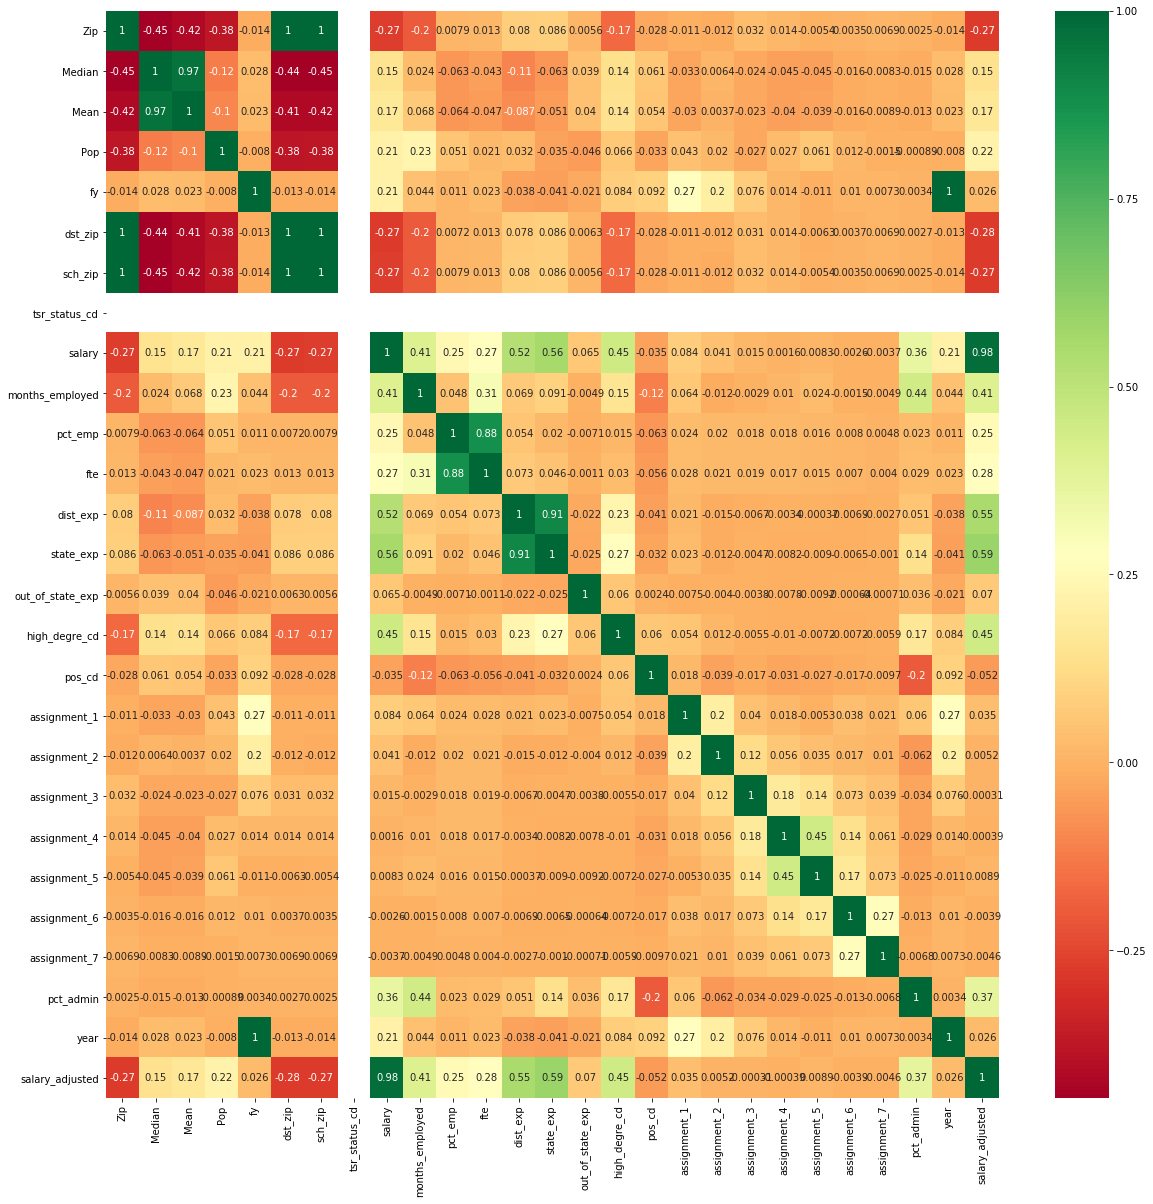

In [144]:
corrmat=master_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(master_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [155]:
master_df.assign5_desc.value_counts().sum()

23207

In [212]:
grouped_errors=pd.pivot_table(data=master_df, index='assign1_desc', values='salary', aggfunc=[np.mean, lambda x: x.sem(), len])

In [213]:
grouped_errors.columns=grouped_errors.columns.get_level_values(level=0)

In [214]:
grouped_errors=grouped_errors.rename(index=str, columns={'mean': 'mean_salary', '<lambda>':'std_err', 'len':'counts'})
#grouped_errors['upper_95_ci']=grouped_errors.mean_salary+(1.96*(grouped_errors['se']))
#grouped_errors['lower_95_ci']=grouped_errors.mean_salary-(1.96*(grouped_errors['se']))



#grouped_errors.to_csv('subject_salaries_gender.csv')

In [215]:
grouped_errors.sort_values(by='counts', ascending=False)

,mean_salary,std_err,counts
Elementary Self Contained (K-5 Only),54081.715607,31.812689,292779.0
Elementary Self-Contained (K-3 Only),57897.094238,55.865883,101897.0
Learning Behavior Specialist I,63522.279577,71.082173,83119.0
Physical Education,62368.246677,85.777494,72805.0
Administration,96284.768872,99.867091,71242.0
Language Arts (Grades 1-8 Only),57198.470457,77.364944,59462.0
English (Grades 9-12 Only),61999.225948,96.891745,54751.0
Basic and/or General Math,56301.012375,89.825982,43778.0
Cross Categorical,55127.520000,99.681927,34521.0
Specific Learning Disability (LD),53740.613301,103.203088,32545.0


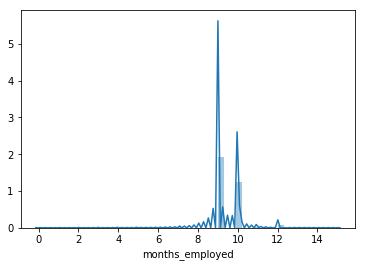

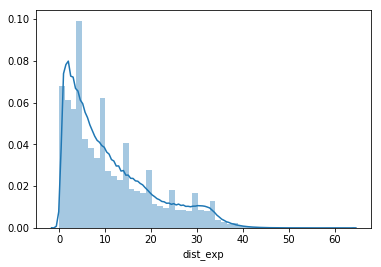

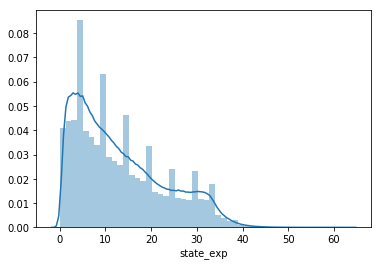

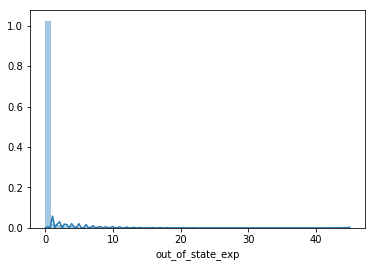

In [227]:
#Relevant columns for modeling
columns=['months_employed','dist_exp', 'state_exp', 'out_of_state_exp']

    
    
for col in columns:
    sns.distplot(master_df[col])
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


OverflowError: cannot convert float infinity to integer

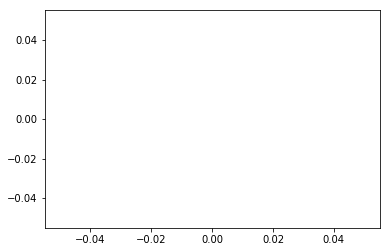

In [230]:
#Do a log transformation on these variables.

columns=['months_employed','dist_exp', 'state_exp', 'out_of_state_exp']


for col in columns:
    master_df[col]=master_df[col].astype(int)
    sns.distplot(np.log(master_df[col]))
    plt.show()